#Exercise

The dataset is about the image data of natural scenes around the world. This dataset size 150 x 150 distributed under 6 categories as follows:




0 - buildings




1 - forest




2 - glacier




3 - mountain




4 - sea




5 - street




The train and test are separated in each files. 




Conduct an analysis using an appropriate deep learning model. You are required to improve the performance of the model. 

In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
#First path in below cell - Your Google drive file location which you want to Unzip
#Second path in below cell - Path where you want to extract the zip file in Google Drive
#!unzip "/content/drive/MyDrive/Colab Notebooks/nature.zip" -d "/content/drive/MyDrive/Colab Notebooks/nature"

Archive:  /content/drive/MyDrive/Colab Notebooks/nature.zip
   creating: /content/drive/MyDrive/Colab Notebooks/nature/nature/
   creating: /content/drive/MyDrive/Colab Notebooks/nature/nature/seg_test/
   creating: /content/drive/MyDrive/Colab Notebooks/nature/nature/seg_test/seg_test/
   creating: /content/drive/MyDrive/Colab Notebooks/nature/nature/seg_test/seg_test/buildings/
  inflating: /content/drive/MyDrive/Colab Notebooks/nature/nature/seg_test/seg_test/buildings/20057.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/nature/nature/seg_test/seg_test/buildings/20060.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/nature/nature/seg_test/seg_test/buildings/20061.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/nature/nature/seg_test/seg_test/buildings/20064.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/nature/nature/seg_test/seg_test/buildings/20073.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/nature/nature/seg_test/seg_test/bui

In [95]:
#OS module in Python is a part of the standard library of the programming language
import os
#module import name for opencv-python (Open Source Computer Vision Library)
import cv2
import keras
#The import random loads the random module, which contains a number of random number generation-related functions
import random
import numpy as np
import matplotlib.pyplot as plot
from keras.models import Sequential
#from matplotlib import pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

os. path. join combines path names into one complete path. 

This means that you can merge multiple parts of a path into one, instead of hard-coding every path name manually.




Python method listdir() returns a list containing the names of the entries in the directory given by path. The list is in arbitrary order.

In [18]:
path ='/content/drive/MyDrive/Colab Notebooks/nature'
training = '/content/drive/MyDrive/Colab Notebooks/nature/nature/seg_train/seg_train'
testing = '/content/drive/MyDrive/Colab Notebooks/nature/nature/seg_test/seg_test'
CATEGORIES = ['buildings','forest','glacier','mountain','sea','street']

In [9]:
data = []
for category in CATEGORIES:
  path = os.path.join(training, category)
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    label = CATEGORIES.index(category)
    #It specifies to load an image in grayscale mode. Can read a color image file in graysacle (black and white).
    arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(arr, (120,120))
    data.append([new_arr, label])

In [19]:
data2 = []
for category in CATEGORIES:
  path = os.path.join(testing, category)
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    label = CATEGORIES.index(category)
    #It specifies to load an image in grayscale mode. Can read a color image file in graysacle (black and white).
    arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(arr, (120,120))
    data2.append([new_arr, label])

In [24]:
a=len(data)
b=len(data2)
a


2700

In [75]:
random.shuffle(data)
X_train=[]
y_train=[]

for features, label in data:
  X_train.append(features)
  y_train.append(label)

X_train=np.array(X_train)
y_train=np.array(y_train)
X_train=X_train/255
X_train = X_train.reshape(-1,120,120)
X_train.shape

(2700, 120, 120)

In [76]:
random.shuffle(data2)
X_test=[]
y_test=[]

for features, label in data2:
  X_test.append(features)
  y_test.append(label)

X_test=np.array(X_test)
y_test=np.array(y_test)
X_test=X_test/255
X_test = X_test.reshape(-1,120,120)
X_test.shape

(536, 120, 120)

In [90]:
#step2 model
L1 = 64
L2 = 64
L3 = 64
model = Sequential()
model.add (Conv2D(L1,(3,3),activation='relu', input_shape=(120,120,1),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(L2,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(rate=0.5))
model.add(Flatten())
model.add(Dense(L3,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(6,activation='softmax'))

In [91]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [92]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
85/85 [==============================] - 77s 891ms/step - loss: 1.4433 - accuracy: 0.4048 - val_loss: 1.2249 - val_accuracy: 0.5336
Epoch 2/10
85/85 [==============================] - 76s 891ms/step - loss: 1.1921 - accuracy: 0.5115 - val_loss: 1.1555 - val_accuracy: 0.5672
Epoch 3/10
85/85 [==============================] - 74s 877ms/step - loss: 1.1579 - accuracy: 0.5322 - val_loss: 1.1284 - val_accuracy: 0.5653
Epoch 4/10
85/85 [==============================] - 73s 857ms/step - loss: 1.0499 - accuracy: 0.5830 - val_loss: 1.1160 - val_accuracy: 0.5858
Epoch 5/10
85/85 [==============================] - 75s 880ms/step - loss: 0.9692 - accuracy: 0.6159 - val_loss: 1.0604 - val_accuracy: 0.6063
Epoch 6/10
85/85 [==============================] - 73s 862ms/step - loss: 0.9252 - accuracy: 0.6348 - val_loss: 1.0724 - val_accuracy: 0.6082
Epoch 7/10
85/85 [==============================] - 76s 900ms/step - loss: 0.8298 - accuracy: 0.6748 - val_loss: 1.0098 - val_accuracy: 0.6250

<Figure size 640x480 with 0 Axes>

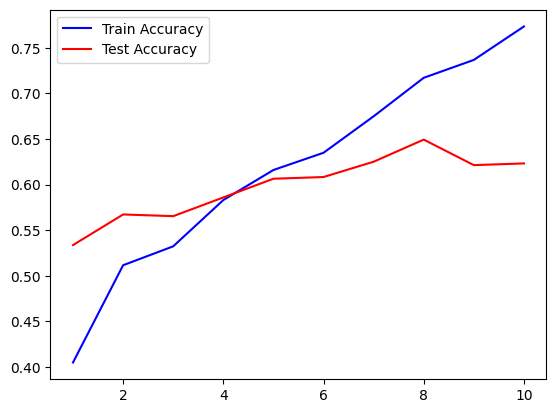

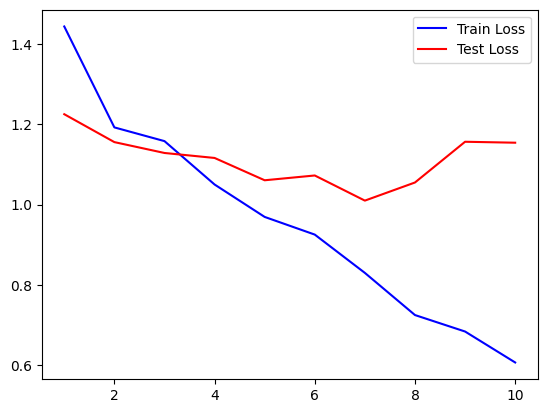

<Figure size 640x480 with 0 Axes>

In [99]:
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs =  range(1,len(acc2)+1)

plt.plot(epochs, acc2, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')
plt.legend()
plt.figure()

In [39]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '/content/drive/MyDrive/Colab Notebooks/nature/nature/seg_train',
                                                     target_size=(224, 224),
                                                     class_mode='categorical',
                                                     seed=111)
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '/content/drive/MyDrive/Colab Notebooks/nature/nature/seg_test',
                                                     target_size=(224, 224),
                                                     class_mode='categorical',
                                                     seed=111)

Found 2700 images belonging to 1 classes.
Found 536 images belonging to 1 classes.


In [40]:
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)
train_generator.class_indices

{'seg_train': 0}